### Генерація графа:

In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby

In [3]:
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

### Перетворення на матрицю:

([[0, inf, 20, 4, inf], [inf, 0, 5, inf, 9], [inf, 1, 0, 15, inf], [inf, inf, inf, 0, -3], [inf, inf, 19, inf, 0]], [0, 1, 2, 3, 4])


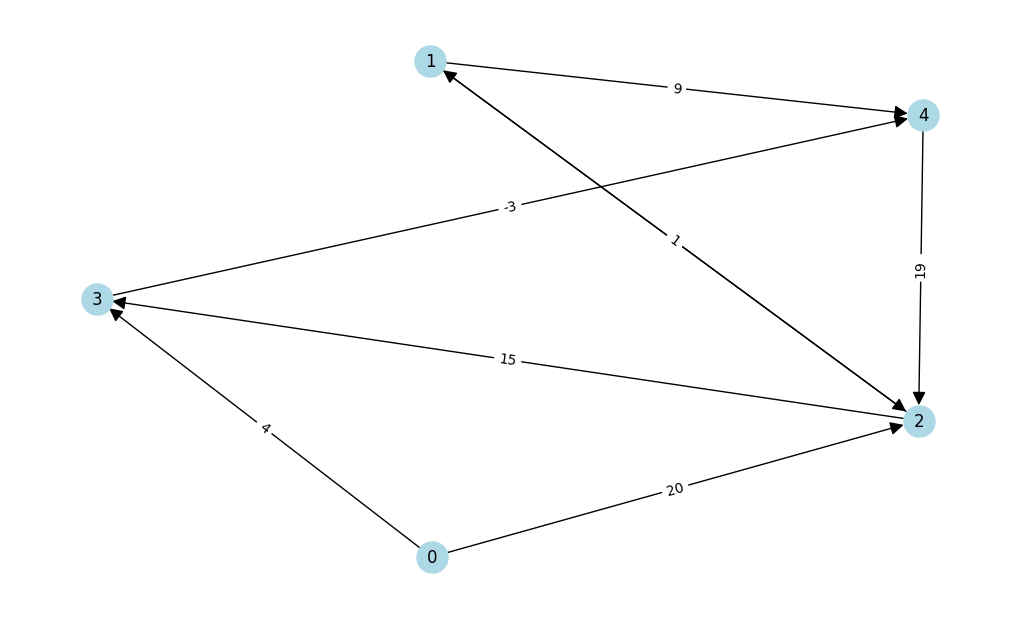

In [4]:
def get_graph():
    """
    gets the matrix of graph

    >>> get_graph([(0, 1, {'weight': 2}), (0, 2, {'weight': 18}), (1, 2, {'weight': 4}), (1, 3, {'weight': 3}),\
    (2, 3, {'weight': 12}), (3, 4, {'weight': -3}), (4, 1, {'weight': -5})], [0, 1, 2, 3, 4])
    [[0, 2, 18, inf, inf], [inf, 0, 4, 3, inf], [inf, inf, 0, 12, inf], \
[inf, inf, inf, 0, -3], [inf, -5, inf, inf, 0]]
    """
    G = gnp_random_connected_graph(5, 0.5, True, True)
    edges = list(G.edges(data=True))
    nodes = list(G.nodes())
    graph = []
    for ind in range(len(nodes)):
        temp = []
        for jnd in range(len(nodes)):
            temp.append(float('inf'))
        temp[ind] = 0
        graph.append(temp)
    for tpl in edges:
        graph[tpl[0]][tpl[1]] = tpl[2]["weight"]
    return graph, nodes

print(get_graph())


### Крускала:

([[0, 14, inf, 17, 13], [inf, 0, inf, -4, inf], [inf, inf, 0, 6, inf], [inf, inf, inf, 0, 12], [inf, inf, inf, inf, 0]], [0, 1, 2, 3, 4])
[(1, 3, -4), (2, 3, 6), (3, 4, 12), (0, 4, 13), (0, 1, 14), (0, 3, 17), (0, 2, inf), (1, 2, inf), (1, 4, inf), (2, 4, inf)]
[(1, 3), (2, 3), (3, 4), (0, 4)]


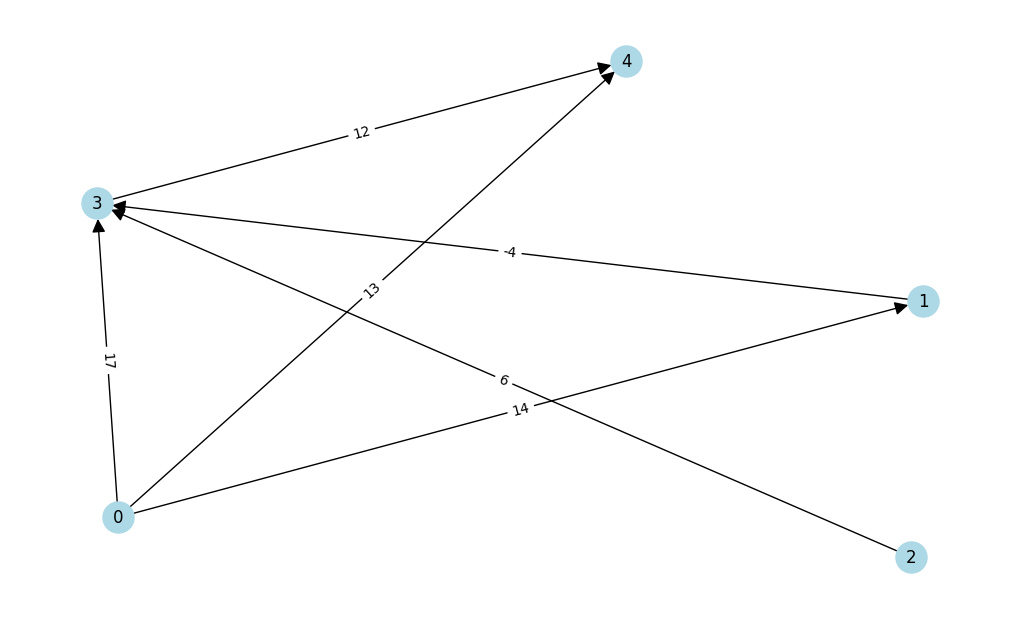

In [8]:
def find_parent(parent, i):
    if parent[i] == i:
        return i
    return find_parent(parent, parent[i])

def kruskal(reachability_matrix):
    edges = []
    for i in range(len(reachability_matrix[0])):
        for j in range(i+1, len(reachability_matrix[0])):
            if reachability_matrix[0][i][j] == 'inf':
                continue
            edges.append((i, j, reachability_matrix[0][i][j]))
    
    edges.sort(key=lambda x: x[2])
    res = []

    for edge in edges:
        u = edge[0]
        v = edge[1]
        parent_u = find_parent(reachability_matrix[1], u)
        parent_v = find_parent(reachability_matrix[1], v)
        
        if parent_u != parent_v:
            res.append(edge[:-1])
            reachability_matrix[1][parent_u] = parent_v
    
    return res

print(kruskal(get_graph()))


### Флойда-Воршалла

([[0, -4, -1, 6, 17], [inf, 0, inf, 10, inf], [12, 8, 0, 18, 19], [inf, inf, inf, 0, inf], [inf, inf, inf, 18, 0]], [0, 1, 2, 3, 4])


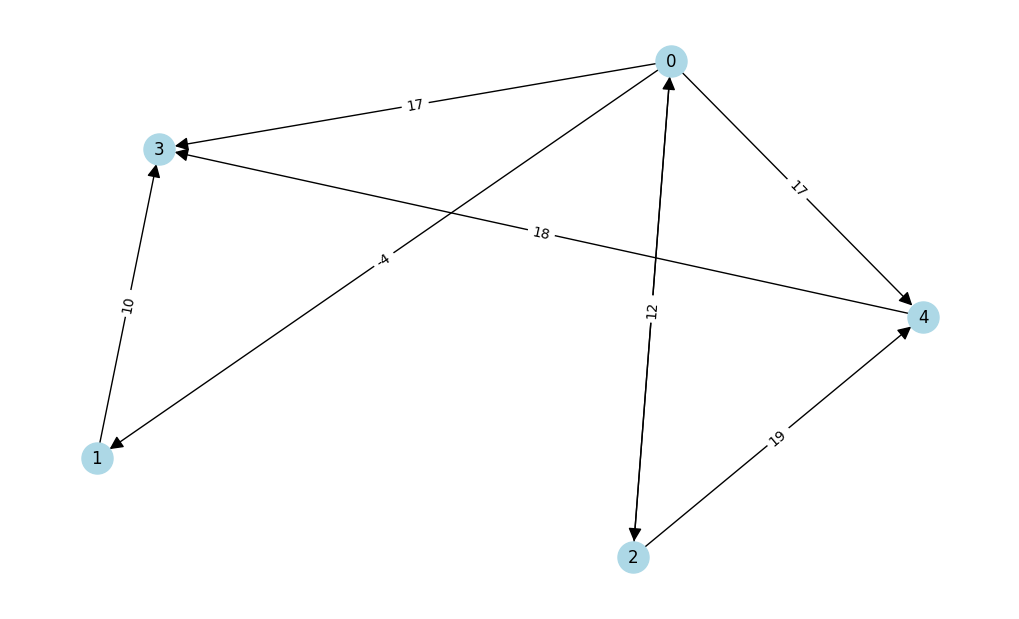

In [6]:
def floyd(graph) -> list:
    """
    >>> floyd([[0, 14, -1, 18, float('inf')], [float('inf'), 0, 18, 14, 16], [float('inf'), float('inf'), 0, 15, float('inf')],\
    [float('inf'), float('inf'), float('inf'), 0, 10], [float('inf'), -1, float('inf'), float('inf'), 0]])
    [[0, 14, -1, 14, 24], \
[inf, 0, 18, 14, 16], \
[inf, 24, 0, 15, 25], \
[inf, 9, 27, 0, 10], \
[inf, -1, 17, 13, 0]]
    """
    for vert in graph[1]:
        for ind in graph[1]:
            for jnd in graph[1]:
                graph[0][ind][jnd] = min(graph[0][ind][vert] + graph[0][vert][jnd], graph[0][ind][jnd])
    return graph

print(floyd(get_graph()))

## Time measuring

### Floyd

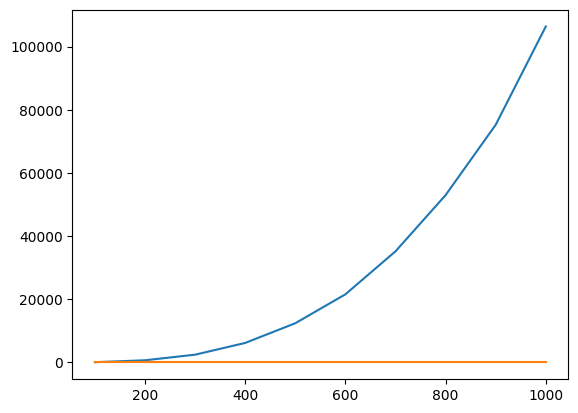

In [1]:
import matplotlib.pyplot as plt
plt.plot((100,200,300,400,500,600,700,800,900,1000), (90.42788,696.40708,2468.92905,6187.65116,12420.75086,21579.23722,35185.99987,52979.70605,75243.34097,106360.1439))
plt.plot((100,200,300,400,500,600,700,800,900,1000),(0.00095,0.0031,0.00095,0.00167,0.00191,0.00215,0.00191,0.00215,0.00191,0.00191,))
plt.show()

### Kraskal

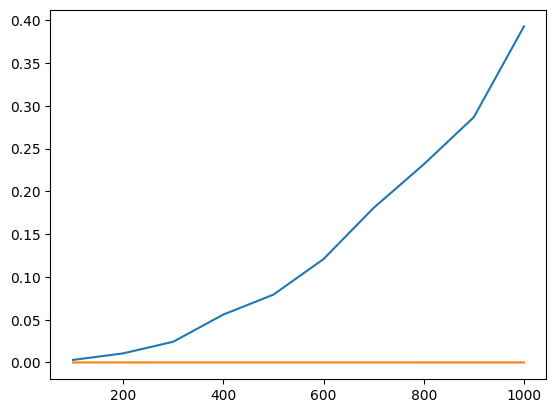

In [2]:
import matplotlib.pyplot as plt
plt.plot((100,200,300,400,500,600,700,800,900,1000),(0.00298,0.01062,0.02424,0.05599,0.07926,0.12079,0.18062,0.23149,0.28666,0.39261))
plt.plot((100,200,300,400,500,600,700,800,900,1000),(0.0,0.0,1e-05,1e-05,1e-05,1e-05,1e-05,1e-05,2e-05,2e-05))
plt.show()

### Tree Classifier:

In [26]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import collections


In [27]:
iris = load_iris()
# iris = load_digits()

In [5]:
X, y = iris.data, iris.target
X.shape, y.shape

((150, 4), (150,))

In [8]:
X, X_test, y, y_test = train_test_split(X, y, test_size= 0.20)

In [9]:
class Node:
    
    def __init__(self, X, y, gini):
        self.X = X
        self.y = y
        self.gini = gini
        self.feature_index = 0
        self.threshold = 0
        self.predicted_class = 0
        self.left = None
        self.right = None

In [35]:
# Implement a decision tree classifier
X, y = iris.data, iris.target
X, X_test, y, y_test = train_test_split(X, y, test_size= 0.20)
class MyDecisionTreeClassifier:
    
    def __init__(self, max_depth):
        self.max_depth = max_depth
        # self.n_classes_ = n_classes_
        # self.n_features_ = n_features_
        # self.tree_ = tree_
    
    def gini(self, groups, classes):
        '''
        A Gini score gives an idea of how good a split is by how mixed the
        classes are in the two groups created by the split.
        
        A perfect separation results in a Gini score of 0,
        whereas the worst case split that results in 50/50
        classes in each group result in a Gini score of 0.5
        (for a 2 class problem).
        '''
        n = sum([len(group) for group in groups])
        gini = 0.0
        for group in groups:
            size = float(len(group))
            if size == 0:
                continue
            proportions = [group.count(c) / size for c in classes]# calculate the proportion of each class in this group
            gini_group = 1.0 - sum([p * p for p in proportions]) # calculate the Gini impurity for this group
            gini += (size / n) * gini_group # weight the Gini impurity by the proportion of samples in this group
        return gini
    
    def split_data(self, X, y) -> tuple[int, int]:
        
        # test all the possible splits in O(N*F) where N in number of samples
        # and F is number of features

        # return index and threshold value
        N, F = X.shape

        best_split_index = None
        best_split_threshold = None
        best_split_score = 1.0

        for feature_index in range(F):
            feature_values = X[:, feature_index]
            sorted_feature_values = np.sort(feature_values)
            for i in range(len(sorted_feature_values) - 1):
                threshold = (sorted_feature_values[i] + sorted_feature_values[i+1]) / 2
                left_indices = np.where(feature_values <= threshold)[0]
                right_indices = np.where(feature_values > threshold)[0]

                left_classes, left_counts = np.unique(y[left_indices], return_counts=True)
                right_classes, right_counts = np.unique(y[right_indices], return_counts=True)
                left_gini = 1.0 - np.sum(np.square(left_counts / len(left_indices)))
                right_gini = 1.0 - np.sum(np.square(right_counts / len(right_indices)))
                split_gini = (len(left_indices) / N) * left_gini + (len(right_indices) / N) * right_gini
                if split_gini < best_split_score:
                    best_split_index = feature_index
                    best_split_threshold = threshold
                    best_split_score = split_gini

        return best_split_index, best_split_threshold
    
    def build_tree(self, X, y, depth = 0) -> Node:
        """
        # create a root node
        
        # recursively split until max depth is not exeeced
        """
        node = Node(
            X,
            y,
            1
        )
        if depth == self.max_depth or len(set(y)) == 1:
            return node
        split_index, threashold = self.split_data(X, y)
        left_x = []
        left_y = []
        right_x = []
        right_y = []
        for ind, lst in enumerate(X):
            if threashold is not None:
                if lst[split_index] > threashold:
                    right_x.append(lst)
                    right_y.append(y[ind])
                else:
                    left_x.append(lst)
                    left_y.append(y[ind])
        # print(right_y, left_y)
        node.threshold = threashold
        node.feature_index = split_index
        node.left = self.build_tree(np.array(left_x), np.array(left_y), depth + 1)
        node.right = self.build_tree(np.array(right_x), np.array(right_y), depth + 1)
        return node


    def fit(self, X, y):
        """
        basically wrapper for build tree / train
        """
        self.tree_ = self.build_tree(X, y)

    
    def predict(self, X_test):
        """
        # traverse the tree while there is a child
        # and return the predicted class for it, 
        # note that X_test can be a single sample or a batch
        """
        node = self.tree_
        while node.left:
            if X_test[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        counter = collections.Counter(node.y)
        most_common_elem, count = counter.most_common(1)[0]
        return most_common_elem

        
    def evaluate(self, X_test, y_test):
        accuracy = 0
        for test_x, test_y in zip(X_test, y_test):
            if test_y == self.predict(test_x):
                accuracy += 1
        return accuracy/len(y_test)
clf = MyDecisionTreeClassifier(5)
clf.fit(X, y)
print("a")
print(clf.evaluate(X_test, y_test))


a
0.3333333333333333
